In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:\\Users\\VasilisFermelis\\Desktop\\FLF.csv')
df

,Delay,Source IP address,Destination IP address,Bandwidth,date_year,date_month_no,date_day,hour,min,sec
0,0.000000,18,117,55,2022,8,9,14,15,16
1,0.014674,116,18,66,2022,8,9,14,15,16
2,0.000000,82,69,75,2022,8,9,14,15,16
3,0.048090,65,83,86,2022,8,9,14,15,16
4,0.000000,18,1,55,2022,8,9,14,15,18
...,...,...,...,...,...,...,...,...,...,...
14944,0.000063,47,82,1434,2022,8,9,14,21,13
14945,0.000017,81,51,74,2022,8,9,14,21,13
14946,0.004248,47,82,1434,2022,8,9,14,21,14
14947,0.024639,47,82,1434,2022,8,9,14,21,14


In [3]:
df.isnull().sum()

Delay                     0
Source IP address         0
Destination IP address    0
Bandwidth                 0
date_year                 0
date_month_no             0
date_day                  0
hour                      0
min                       0
sec                       0
dtype: int64

In [4]:
df.dtypes

Delay                     float64
Source IP address           int64
Destination IP address      int64
Bandwidth                   int64
date_year                   int64
date_month_no               int64
date_day                    int64
hour                        int64
min                         int64
sec                         int64
dtype: object

In [5]:
# visualize the data
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

In [6]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,1:12]
y = df.iloc[:,0] 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [7]:
X

,Source IP address,Destination IP address,Bandwidth,date_year,date_month_no,date_day,hour,min,sec
0,18,117,55,2022,8,9,14,15,16
1,116,18,66,2022,8,9,14,15,16
2,82,69,75,2022,8,9,14,15,16
3,65,83,86,2022,8,9,14,15,16
4,18,1,55,2022,8,9,14,15,18
...,...,...,...,...,...,...,...,...,...
14944,47,82,1434,2022,8,9,14,21,13
14945,81,51,74,2022,8,9,14,21,13
14946,47,82,1434,2022,8,9,14,21,14
14947,47,82,1434,2022,8,9,14,21,14


In [8]:
# compare algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

C:\Users\VasilisFermelis\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


LR: 0.542770 (0.007110)


C:\Users\VasilisFermelis\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


LDA: 0.519860 (0.007914)


C:\Users\VasilisFermelis\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


KNN: 0.804165 (0.010852)
CART: 0.870808 (0.006185)


C:\Users\VasilisFermelis\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\VasilisFermelis\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


NB: 0.699056 (0.007475)


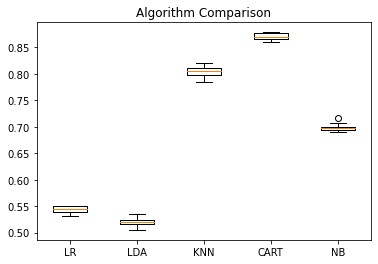

In [9]:
# Split-out validation dataset
X = df.iloc[:,2:12]
y = df.iloc[:,1] 
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [10]:
X_validation

,Destination IP address,Bandwidth,date_year,date_month_no,date_day,hour,min,sec
3019,83,1506,2022,8,9,14,16,50
3623,81,74,2022,8,9,14,16,51
1398,83,74,2022,8,9,14,16,42
7929,54,75,2022,8,9,14,17,41
11909,97,54,2022,8,9,14,21,3
...,...,...,...,...,...,...,...,...
7059,16,77,2022,8,9,14,16,57
10786,82,86,2022,8,9,14,20,4
9090,0,480,2022,8,9,14,18,52
58,1,55,2022,8,9,14,16,19


In [11]:
batch_size = 128
epochs = 100
model = Sequential()
model.add(Dense(64, activation= "relu",input_shape=(9,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation= "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation= "linear"))
model.compile(loss= "mse", optimizer= "Adam")
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose =1, validation_split=(0.1))

NameError: name 'Sequential' is not defined

In [ ]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [ ]:
predictions

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [ ]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))